# 네이버 코스피 크롤링(iframe)

In [1]:
base_url = 'https://finance.naver.com'
src="/sise/sise_index_day.nhn?code=KPI200"
url = base_url + src
url

'https://finance.naver.com/sise/sise_index_day.nhn?code=KPI200'

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import datetime as dt

In [5]:
result_list = []

for num in range(1, 558):
    params = {
        'page' : num
    }
    resp = requests.get(url, params)
    soup = BeautifulSoup(resp.content, 'html.parser')
    tr_list = soup.find('table').find_all('tr')
    tr_list2 = tr_list[2:5] + tr_list[9:]
    for tr in tr_list2:

        if not tr.text.strip():
            continue

        date = tr.find('td', class_='date').text
        date = pd.to_datetime(date).date()
        price = tr.find('td', class_='number_1').text

        new_dict = {
            'date' : date,
            'price' : price
        }
        result_list.append(new_dict)
    df1 = pd.DataFrame(result_list)

from pprint import pprint
pprint(result_list)

[{'date': datetime.date(2019, 7, 3), 'price': '272.37'},
 {'date': datetime.date(2019, 7, 2), 'price': '275.97'},
 {'date': datetime.date(2019, 7, 1), 'price': '277.27'},
 {'date': datetime.date(2019, 6, 28), 'price': '277.50'},
 {'date': datetime.date(2019, 6, 27), 'price': '277.75'},
 {'date': datetime.date(2019, 6, 26), 'price': '275.53'},
 {'date': datetime.date(2019, 6, 25), 'price': '275.28'},
 {'date': datetime.date(2019, 6, 24), 'price': '275.58'},
 {'date': datetime.date(2019, 6, 21), 'price': '275.48'},
 {'date': datetime.date(2019, 6, 20), 'price': '276.01'},
 {'date': datetime.date(2019, 6, 19), 'price': '275.31'},
 {'date': datetime.date(2019, 6, 18), 'price': '271.36'},
 {'date': datetime.date(2019, 6, 17), 'price': '270.09'},
 {'date': datetime.date(2019, 6, 14), 'price': '270.48'},
 {'date': datetime.date(2019, 6, 13), 'price': '271.13'},
 {'date': datetime.date(2019, 6, 12), 'price': '272.74'},
 {'date': datetime.date(2019, 6, 11), 'price': '273.21'},
 {'date': datetim

In [25]:
df1 = pd.DataFrame(result_list, columns = ['Date', 'Kospi'])
df1

,Date,Kospi
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN


In [40]:
df1 = pd.DataFrame(result_list)
df1.columns = ['Date', 'Kospi']
df1 = df1.set_index('Date')

# 네이버 SP500 크롤링  
page가 params로 출력되지 않는 경우

In [ ]:
https://finance.naver.com/world/worldDayListJson.nhn?symbol=SPI@SPX&fdtc=0&page=5

In [28]:
url2 = 'https://finance.naver.com/world/worldDayListJson.nhn?symbol=SPI@SPX&fdtc=0'
for num in range(1, 442):
    params = {
        'page' : 5
    }
    resp = requests.get(url2, params = params)
    soup = resp.json()
    print(soup)
    break

[{'symb': 'SPI@SPX', 'xymd': '20190506', 'open': 2908.89, 'high': 2937.32, 'low': 2898.21, 'clos': 2932.47, 'diff': -13.17, 'rate': -0.45, 'gvol': 1857443100}, {'symb': 'SPI@SPX', 'xymd': '20190503', 'open': 2929.21, 'high': 2947.85, 'low': 2929.21, 'clos': 2945.64, 'diff': 28.12, 'rate': 0.96, 'gvol': 1880651490}, {'symb': 'SPI@SPX', 'xymd': '20190502', 'open': 2922.16, 'high': 2931.68, 'low': 2900.5, 'clos': 2917.52, 'diff': -6.21, 'rate': -0.21, 'gvol': 2136002300}, {'symb': 'SPI@SPX', 'xymd': '20190501', 'open': 2952.33, 'high': 2954.13, 'low': 2923.36, 'clos': 2923.73, 'diff': -22.1, 'rate': -0.75, 'gvol': 2227214300}, {'symb': 'SPI@SPX', 'xymd': '20190430', 'open': 2937.14, 'high': 2948.22, 'low': 2924.11, 'clos': 2945.83, 'diff': 2.8, 'rate': 0.1, 'gvol': 2364280370}, {'symb': 'SPI@SPX', 'xymd': '20190429', 'open': 2940.58, 'high': 2949.52, 'low': 2939.35, 'clos': 2943.03, 'diff': 3.15, 'rate': 0.11, 'gvol': 1848856720}, {'symb': 'SPI@SPX', 'xymd': '20190426', 'open': 2925.81, '

In [32]:
url2 = 'https://finance.naver.com/world/worldDayListJson.nhn?symbol=SPI@SPX&fdtc=0'
result = []
for num in range(1, 442):
    params = {
        'page' : num
    }
    resp = requests.get(url2, params = params)
    soup = resp.json()

    for x in soup:
        new_dict = {
            'date' : pd.to_datetime(x['xymd']).date(),
            'SP' : x['clos']
        }
        result.append(new_dict)
pprint(result)

[{'SP': 2973.01, 'date': datetime.date(2019, 7, 2)},
 {'SP': 2964.33, 'date': datetime.date(2019, 7, 1)},
 {'SP': 2941.76, 'date': datetime.date(2019, 6, 28)},
 {'SP': 2924.92, 'date': datetime.date(2019, 6, 27)},
 {'SP': 2913.78, 'date': datetime.date(2019, 6, 26)},
 {'SP': 2917.38, 'date': datetime.date(2019, 6, 25)},
 {'SP': 2945.35, 'date': datetime.date(2019, 6, 24)},
 {'SP': 2950.46, 'date': datetime.date(2019, 6, 21)},
 {'SP': 2954.18, 'date': datetime.date(2019, 6, 20)},
 {'SP': 2926.46, 'date': datetime.date(2019, 6, 19)},
 {'SP': 2917.75, 'date': datetime.date(2019, 6, 18)},
 {'SP': 2889.67, 'date': datetime.date(2019, 6, 17)},
 {'SP': 2886.98, 'date': datetime.date(2019, 6, 14)},
 {'SP': 2891.64, 'date': datetime.date(2019, 6, 13)},
 {'SP': 2879.84, 'date': datetime.date(2019, 6, 12)},
 {'SP': 2885.72, 'date': datetime.date(2019, 6, 11)},
 {'SP': 2886.73, 'date': datetime.date(2019, 6, 10)},
 {'SP': 2873.34, 'date': datetime.date(2019, 6, 7)},
 {'SP': 2843.49, 'date': dateti

 {'SP': 1301.74, 'date': datetime.date(2006, 4, 25)},
 {'SP': 1308.11, 'date': datetime.date(2006, 4, 24)},
 {'SP': 1311.28, 'date': datetime.date(2006, 4, 21)},
 {'SP': 1311.46, 'date': datetime.date(2006, 4, 20)},
 {'SP': 1309.93, 'date': datetime.date(2006, 4, 19)},
 {'SP': 1307.65, 'date': datetime.date(2006, 4, 18)},
 {'SP': 1285.33, 'date': datetime.date(2006, 4, 17)},
 {'SP': 1289.12, 'date': datetime.date(2006, 4, 13)},
 {'SP': 1288.12, 'date': datetime.date(2006, 4, 12)},
 {'SP': 1286.57, 'date': datetime.date(2006, 4, 11)},
 {'SP': 1296.6, 'date': datetime.date(2006, 4, 10)},
 {'SP': 1295.5, 'date': datetime.date(2006, 4, 7)},
 {'SP': 1309.04, 'date': datetime.date(2006, 4, 6)},
 {'SP': 1311.56, 'date': datetime.date(2006, 4, 5)},
 {'SP': 1305.93, 'date': datetime.date(2006, 4, 4)},
 {'SP': 1297.81, 'date': datetime.date(2006, 4, 3)},
 {'SP': 1294.83, 'date': datetime.date(2006, 3, 31)},
 {'SP': 1300.25, 'date': datetime.date(2006, 3, 30)},
 {'SP': 1302.89, 'date': datetime.d

In [39]:
df2 = pd.DataFrame(result, columns = ['date', 'SP'])
df2.columns = ['Date', 'SP']
df2 = df2.set_index('Date')

In [44]:
df_t = df1.join(df2, how = 'outer')
df_t

,Kospi,SP
Date,,
2002-01-02,NaN,1154.67
2002-01-03,NaN,1165.27
2002-01-04,NaN,1172.51
2002-01-07,NaN,1164.89
2002-01-08,NaN,1160.71
2002-01-09,NaN,1155.14
2002-01-10,NaN,1156.55
2002-01-11,NaN,1145.60
2002-01-14,NaN,1138.41


In [58]:
df_a = df_t.loc[dt.date(2016, 1, 1):]
df_a

,Kospi,SP
Date,,
2016-01-04,234.63,2012.66
2016-01-05,236.13,2016.71
2016-01-06,234.60,1990.26
2016-01-07,231.93,1943.09
2016-01-08,233.68,1922.03
2016-01-11,230.83,1923.67
2016-01-12,230.55,1938.68
2016-01-13,233.52,1890.28
2016-01-14,231.38,1921.84


In [54]:
print(dt.date(2016,1,1))

2016-01-01


In [59]:
df_a = df_a.fillna(method='ffill')
if df_a.isnull().values.any():
    df_a = df_a.fillna(method='bfill')

### ffill = forward fill  
앞의 데이터로 뒤의 구멍을 채우는것
### bfill = backward fill  
뒤의 데이터로 앞의 구멍을 채움는 것

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


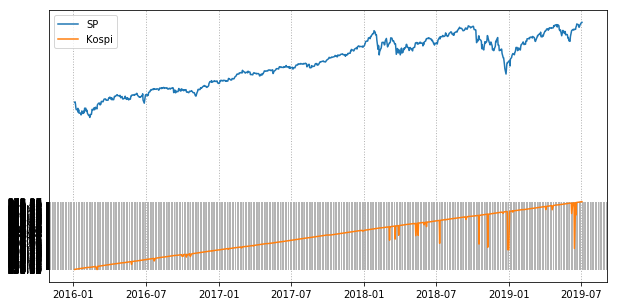

In [61]:
plt.figure(figsize = (10, 5))
plt.plot(df_a['SP'])
plt.plot(df_a['Kospi'])
plt.legend(loc=0)
plt.grid(True, color = '0.7', linestyle=':', linewidth=1)

In [62]:
"""
# 오류가 터지는 이유 : 코스피 데이터가 텍스트이다. --> 형 변환을 해야한다. 
# 해결방법 1. 처음부터 숫자열로 바꿔서 가져오기
# 해결방법 2. 데이터에서 형변환하기.
plt.figure(figsize = (10, 5))
# plt.plot(total['SP'])
plt.plot(total['kospi'])
plt.legend(loc=0)
plt.grid(True, color = '0.7', linestyle=':', linewidth=1)
"""

"\n# 오류가 터지는 이유 : 코스피 데이터가 텍스트이다. --> 형 변환을 해야한다. \n# 해결방법 1. 처음부터 숫자열로 바꿔서 가져오기\n# 해결방법 2. 데이터에서 형변환하기.\nplt.figure(figsize = (10, 5))\n# plt.plot(total['SP'])\nplt.plot(total['kospi'])\nplt.legend(loc=0)\nplt.grid(True, color = '0.7', linestyle=':', linewidth=1)\n"

In [64]:
df_a['Kospi'] = pd.to_numeric(df_a['Kospi'])

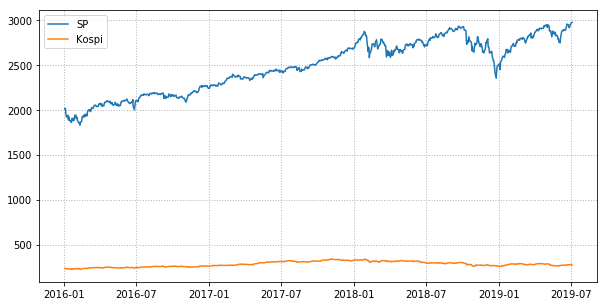

In [67]:
plt.figure(figsize = (10, 5))
plt.plot(df_a['SP'])
plt.plot(df_a['Kospi'])
plt.legend(loc=0)
plt.grid(True, color = '0.7', linestyle=':', linewidth=1)

### 값의 차이가 커서 그래스가 잘 나타나지 않음  
지수화가 필요하다

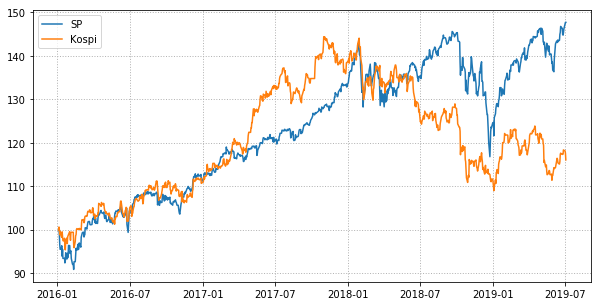

In [68]:
plt.figure(figsize = (10, 5))
plt.plot(df_a['SP'] / df_a['SP'].loc[dt.date(2016,1,4)]*100)
plt.plot(df_a['Kospi'] / df_a['Kospi'].loc[dt.date(2016,1,4)]*100)
plt.legend(loc=0)
plt.grid(True, color = '0.7', linestyle=':', linewidth=1)